In [1]:
%pip install -q torchviz

In [2]:
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import optim

%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['axes.grid'] = True
np.set_printoptions(suppress=True, precision=4)

### Basic Operations

In [3]:
x = torch.Tensor([[3,4],[2,3]])
display(x)
display(x.shape)

tensor([[3., 4.],
        [2., 3.]])

torch.Size([2, 2])

In [4]:
print(torch.zeros(1, 2, 3))
print(torch.ones(1, 2, 3))
print(torch.randn(1, 2, 3))

tensor([[[0., 0., 0.],
         [0., 0., 0.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.]]])
tensor([[[ 0.3854,  0.9438, -0.9804],
         [-0.8479, -0.0766, -0.5941]]])


In [5]:
x = torch.arange(9)

x = x.view([3,3])
print(x)

x = x.transpose(0, 1)
print(x)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])


In [6]:
x = torch.arange(16).view([2, 4, 2])
print(x.view([-1, 2]))
print(x.view([4, -1]))

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])


In [7]:
x = torch.arange(16).view([4, 4])

# Max in the matrix.
print(x)
print(x.max().item())

# Max for each column.
values, indices = x.max(0)
print(f'values: {values}')
print(f'indices: {indices}')

# Max for each row.
values, indices = x.max(1)
print(f'values: {values}')
print(f'indices: {indices}')

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])
15
values: tensor([12, 13, 14, 15])
indices: tensor([3, 3, 3, 3])
values: tensor([ 3,  7, 11, 15])
indices: tensor([3, 3, 3, 3])


In [8]:
# To Numpy array.
x.numpy()

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

### AutoGrad

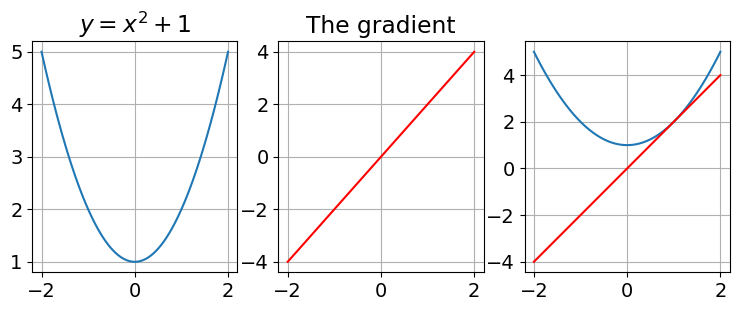

In [9]:
x = torch.tensor(np.linspace(-2, 2, 100),
                 requires_grad=True,
                dtype=torch.float32)
y = x**2 + 1

# Plot the x and y.
plt.figure(figsize=(9, 3))
ax = plt.subplot(1, 3, 1)
ax.set_title('$y = x^2 + 1$')
ax.plot(x.data, y.data)

# Plot the gradient values.
y.sum().backward()
ax = plt.subplot(1, 3, 2)
ax.set_title('The gradient')
ax.plot(x.data, x.grad, c='red')


# Plot the x, y, and the tangent line.
ax = plt.subplot(1, 3, 3)
ax.plot(x.data, y.data)
ax.plot(x.data, x.grad, c='red')

plt.show()

### Back Propagation

Text(0, 0.5, 'y')

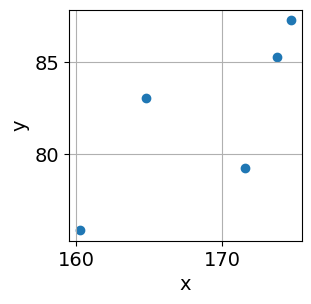

In [10]:
data = np.array([
    [171.52, 79.25],
    [164.80, 83.04],
    [173.75, 85.29],
    [174.70, 87.27],
    [160.24, 75.86],
])

x = data[:,0]
y = data[:,1]
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

##### Optimization using Gradient Descent
1. Run the inference and get the output
2. Calculate the ```loss``` with the output and the actual value
3. Calculate the ```gradient``` of the loss by backpropagation
4. Update parameters by ```param = param - learning_rate * param.grad```

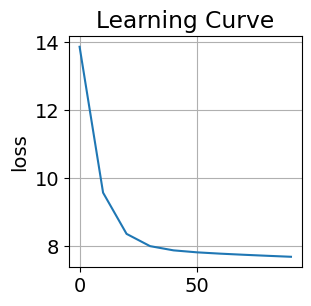

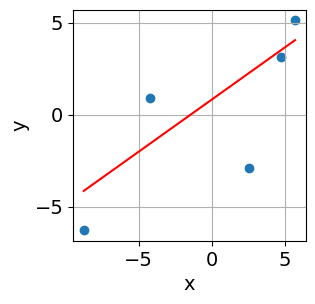

In [11]:
def predict(X, W, B):
  return W * X + B

def mse(actual, expected):
    return ((actual - expected) ** 2).mean()

X = torch.tensor(x - x.mean()).float()
Y = torch.tensor(y - y.mean()).float()
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 100
lr = 1e-3
history = []
for epoch in range(num_epochs):
    # Forward.
    output = predict(X, W, B)
    loss = mse(output, Y)

    # Backward and update parameters (W, B).
    loss.backward()

    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad

    # Clear the gradient data.
    W.grad.zero_()
    B.grad.zero_()

    if (epoch % 10 == 0):
        history.append([epoch, loss.item()])

# Show the loss history.
history = np.array(history)
plt.plot(history[:, 0], history[:, 1])
plt.title('Learning Curve')
plt.ylabel('loss')
plt.show()

# Show the result.
plt.scatter(X, Y)

X_range = torch.Tensor((X.min(), X.max()))
Y_range = predict(X_range, W, B)
plt.plot(X_range.data, Y_range.data, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

PyTorch Optimizer
* ```torch.optim.Optimizer(params, **kwargs)```
  * params: Parameters to be updated by this optimizer
* ```torch.optim.Optimizer::step()```
  * Update ```params``` by specified optimization using the ```param.grad```
* ```torch.optim.Optimizer::zero_grad()```
  * Clear the gradient value of each parameter

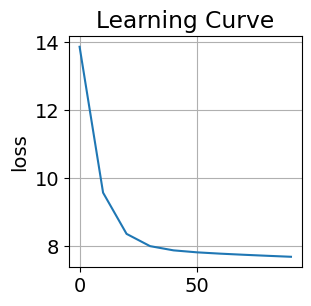

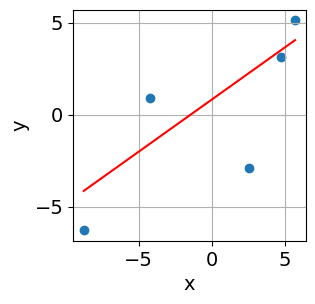

In [12]:
def predict(X, W, B):
  return W * X + B

def mse(actual, expected):
    return ((actual - expected) ** 2).mean()

X = torch.tensor(x - x.mean()).float()
Y = torch.tensor(y - y.mean()).float()
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()
optimizer = optim.SGD([W, B], lr=1e-3)

num_epochs = 100
history = []
for epoch in range(num_epochs):
    # Forward.
    output = predict(X, W, B)
    loss = mse(output, Y)

    # Backward and update parameters (W, B).
    loss.backward()
    optimizer.step()

    # Clear the gradient data.
    optimizer.zero_grad()

    if (epoch % 10 == 0):
        history.append([epoch, loss.item()])

# Show the loss history.
history = np.array(history)
plt.plot(history[:, 0], history[:, 1])
plt.title('Learning Curve')
plt.ylabel('loss')
plt.show()

# Show the result.
plt.scatter(X, Y)

X_range = torch.Tensor((X.min(), X.max()))
Y_range = predict(X_range, W, B)
plt.plot(X_range.data, Y_range.data, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()